In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [3]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

def create_time_series_lorenz(dt, num_steps, s=10, r=28, b=2.667):
    # Need one more for the initial values
    xs = np.empty(num_steps + 1)
    ys = np.empty(num_steps + 1)
    zs = np.empty(num_steps + 1)
    # Set initial values
    xs[0], ys[0], zs[0] = (0., 1., 1.05)

    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], s=s, r=r, b=b)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    return xs, ys, zs

In [6]:
dt = 0.01
num_steps = 10000
xs, ys, zs = create_time_series_lorenz(dt, num_steps, s=10, r=28, b=2.667)

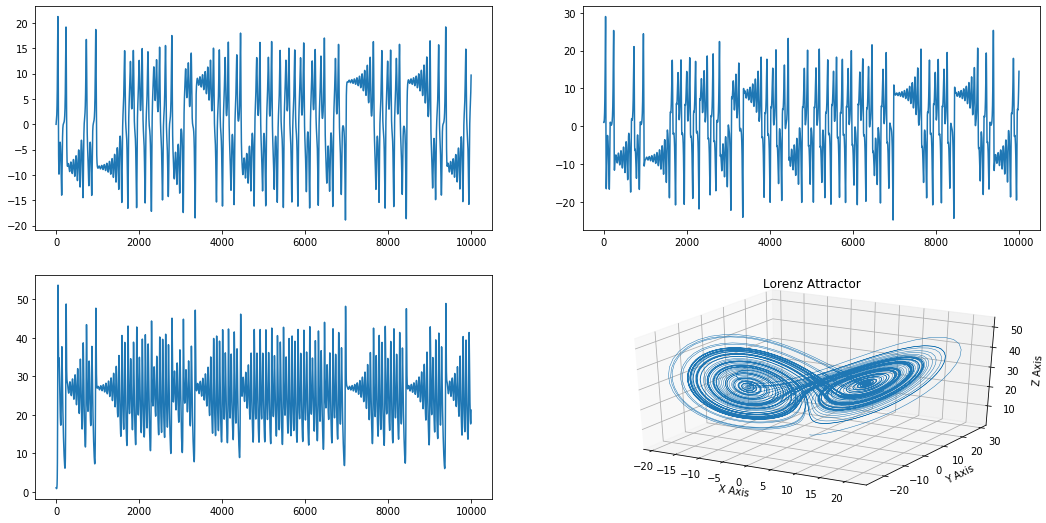

In [7]:
# Plot
fig = plt.figure(figsize=(18,14))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax1.plot(xs)
ax2.plot(ys)
ax3.plot(zs)
ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

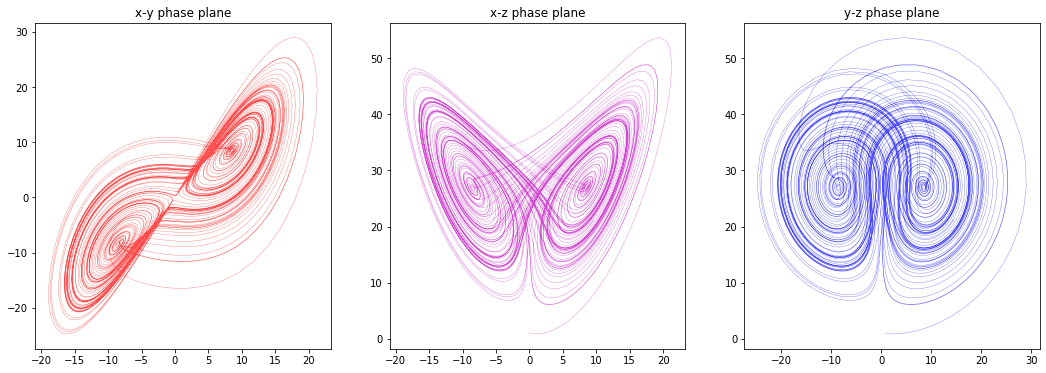

In [8]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# plot the x values vs the y values
ax1.plot(xs, ys, color='r', alpha=0.7, linewidth=0.3)
ax1.set_title('x-y phase plane')

# plot the x values vs the z values
ax2.plot(xs, zs, color='m', alpha=0.7, linewidth=0.3)
ax2.set_title('x-z phase plane')

# plot the y values vs the z values
ax3.plot(ys, zs, color='b', alpha=0.7, linewidth=0.3)
ax3.set_title('y-z phase plane')

#fig.savefig('{}/lorenz-attractor-phase-plane.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()

# Hankel Matrix

Preparação da matriz de Hankel para propagação das informações também dos eixos Y e Z. Com a utilização da matriz de Hankel é possível trabalhar com o atraso (*delay*) das outras variáveis, apenas pela utilização do *shift* de informações da série principal.

In [18]:
def hankel_matrix(time_series, shift=0, 
                  size_window=8000, 
                  hankel_matrix_size=8):
    hm = np.array( [ time_series[ shift : size_window+shift ] ] )
    for i in range(1,hankel_matrix_size):
        hm = np.append(hm, [ time_series[  (i+shift) : (size_window+shift+i)  ] ], axis=0)
    return hm

In [19]:
hm = hankel_matrix(xs, shift=0, size_window=8000, hankel_matrix_size=8)

In [16]:
u, sdiag, vh = np.linalg.svd(hm, full_matrices=True)

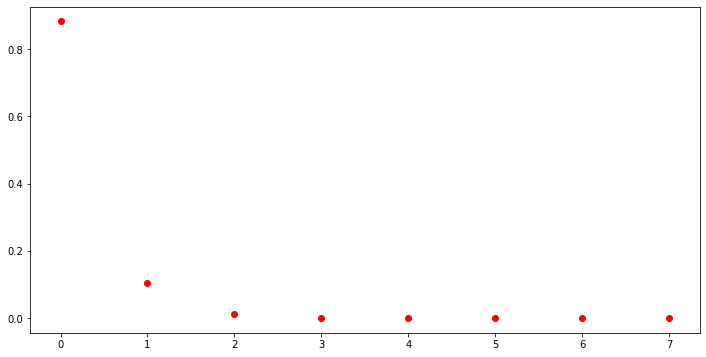

In [17]:
plt.figure(figsize=(12,6))
plt.plot(sdiag / np.sum(sdiag), 'ro')
plt.show()

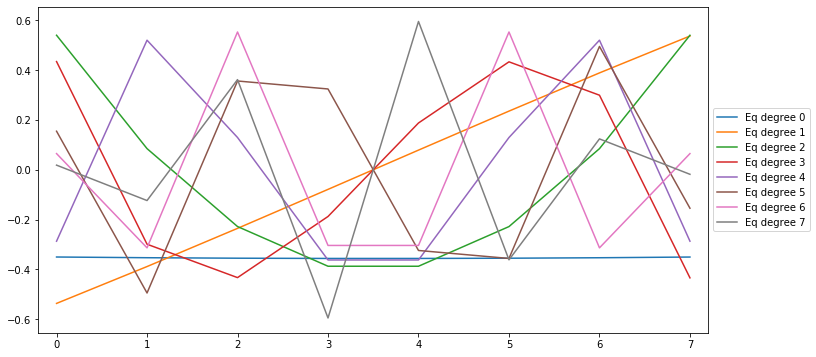

In [8]:
plt.figure(figsize=(12,6))
for i in range(len(u)):
    plt.plot(u[:,i], label='Eq degree {}'.format(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([-0.2,7.2])
plt.show()

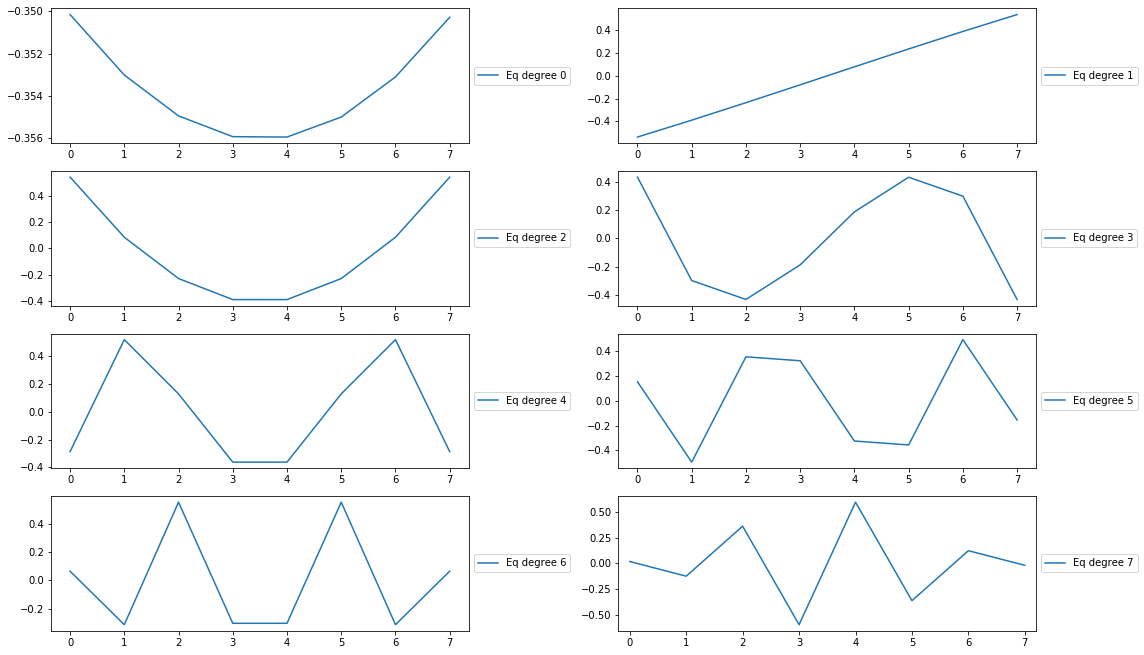

In [42]:
fig = plt.figure(figsize=(16, 18))
axes = []
for i in range(len(u)):
    axes.append(fig.add_subplot(8, 2, (i+1)))
    axes[i].plot(u[:,i], label='Eq degree {}'.format(i))
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim([-0.2,7.2])
plt.tight_layout()
plt.show()

In [1]:
# Plot
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.plot(xs, ys, zs, lw=0.5)
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")
ax1.set_title("Lorenz Attractor")

ax2.plot(vh[:,0], vh[:,1], vh[:,2], lw=0.5)
ax2.set_xlabel("X Axis")
ax2.set_ylabel("Y Axis")
ax2.set_zlabel("Z Axis")
ax2.set_title("Reconstrunction Atractor")
plt.show()

NameError: name 'plt' is not defined

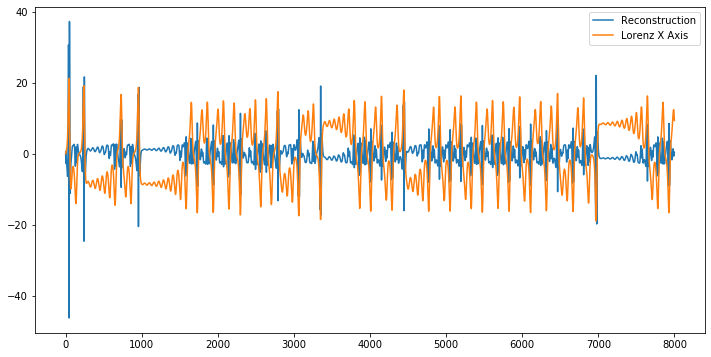

In [9]:
xs_p = xs[:vh.shape[0]]
vh_p = 300*vh[:,4]

plt.figure(figsize=(12,6))
plt.plot(vh_p, label='Reconstruction')
plt.plot(xs_p, label='Lorenz X Axis')
plt.legend()
#plt.xlim([-0.2,7.2])
plt.show()

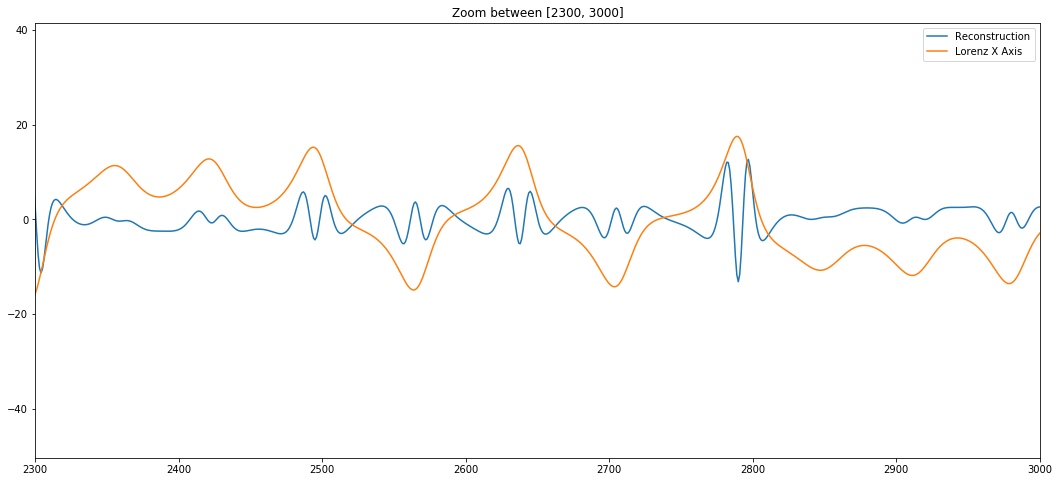

In [32]:
zoom = [2300,3000]
fig = plt.figure(figsize=(18, 8))
plt.plot(vh_p, label='Reconstruction')
plt.plot(xs_p, label='Lorenz X Axis')
plt.legend()
plt.xlim(zoom)
plt.title('Zoom between {}'.format(zoom))
plt.show()